# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [3]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
from collections import Counter
%matplotlib inline

#### Extract label names from csv file

In [4]:
signnames = pd.read_csv('./signnames.csv')
signnames.set_index('ClassId',inplace=True)
def get_class_name(label):
    return signnames.loc[label].SignName

#### Count number of each class present in the training set

In [5]:
class_counts = Counter(y_train)
print('Counts of each class (sorted frommost common to least common):-')
for cls in class_counts.most_common():
    print('\t"{}" train sample: {}'.format(get_class_name(cls[0]), cls[1]))

Counts of each class (sorted frommost common to least common):-
	"Speed limit (50km/h)" train sample: 2010
	"Speed limit (30km/h)" train sample: 1980
	"Yield" train sample: 1920
	"Priority road" train sample: 1890
	"Keep right" train sample: 1860
	"No passing for vehicles over 3.5 metric tons" train sample: 1800
	"Speed limit (70km/h)" train sample: 1770
	"Speed limit (80km/h)" train sample: 1650
	"Road work" train sample: 1350
	"No passing" train sample: 1320
	"Speed limit (100km/h)" train sample: 1290
	"Speed limit (60km/h)" train sample: 1260
	"Speed limit (120km/h)" train sample: 1260
	"Right-of-way at the next intersection" train sample: 1170
	"Ahead only" train sample: 1080
	"General caution" train sample: 1080
	"No entry" train sample: 990
	"Wild animals crossing" train sample: 690
	"Stop" train sample: 690
	"Turn right ahead" train sample: 599
	"Traffic signals" train sample: 540
	"No vehicles" train sample: 540
	"Children crossing" train sample: 480
	"Slippery road" train samp

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

#### Visualize a random image with label 

Road work


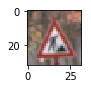

In [6]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(get_class_name(y_train[index]))

#### Visualize the class distribution through bar plot

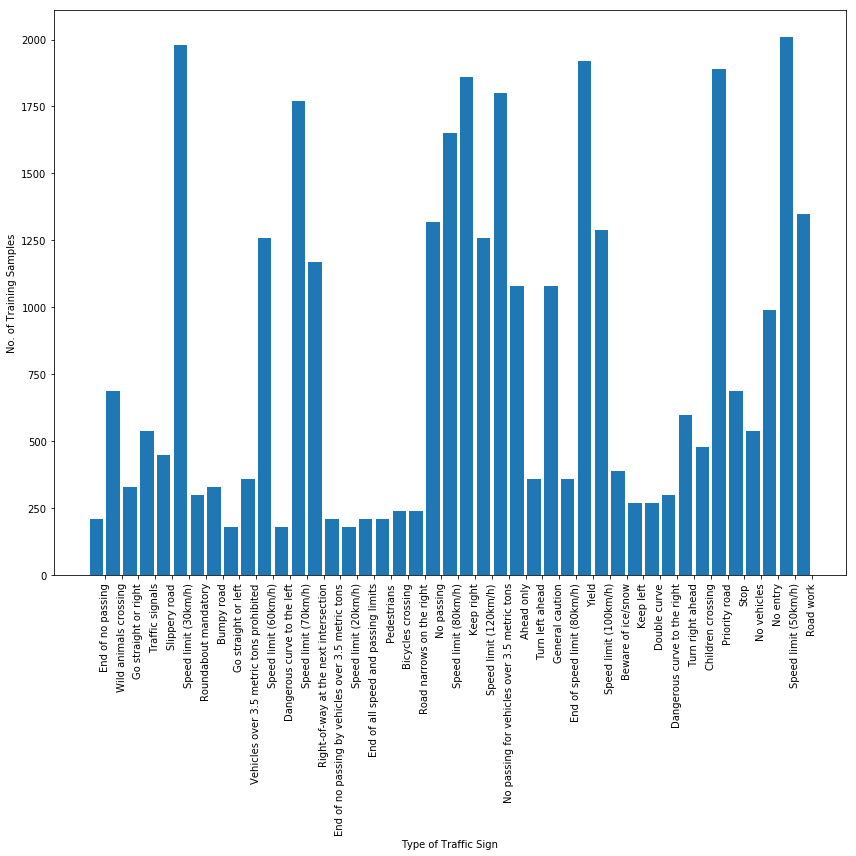

In [7]:
plt.figure(figsize=(12,12))
labels, values = zip(*class_counts.items())
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values)
plt.xticks(indexes + width * 0.5, map(get_class_name,labels),rotation=90)
plt.xlabel('Type of Traffic Sign')
plt.ylabel('No. of Training Samples');
plt.tight_layout()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### Functions to transform and augment images which will be used to preprocess the data

In [8]:
import cv2
## Function to convert RGB image to YUV image
def transform_to_yuv(img):
    gb_img = cv2.GaussianBlur(img, (5,5), 20.0)
    img = cv2.addWeighted(img, 2, gb_img, -1, 0)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    # return only Y-dimension of the transformed image
    img = img[:,:,0].reshape(32,32,1)
    return img
## Function to rotate images randomly for augmentation purpose
def random_rotate(img):
    c_x,c_y = int(img.shape[0]/2), int(img.shape[1]/2)
    ang = 30.0*np.random.rand()-15
    Mat = cv2.getRotationMatrix2D((c_x, c_y), ang, 1.0)
    return cv2.warpAffine(img, Mat, img.shape[:2])
## Function to scale images randomly for augmentation process
def random_scale(img):
    img2=img.copy()
    sc_y=0.4*np.random.rand()+1.0
    img2=cv2.resize(img, None, fx=1, fy=sc_y, interpolation = cv2.INTER_CUBIC)
    
    dy = int((img2.shape[1]-img.shape[0])/2)
    end = img.shape[1]-dy
    img2 = img2[dy:end,:,:]
    assert img2.shape[0] == 32
    return img2
## Function to combine the operations of random rotate and randomscale to augment the data
def augment_img(img):
    img = random_rotate(img)
    img = random_scale(img)
    return transform_to_yuv(img)

#### Visualize original and transformed images side by side

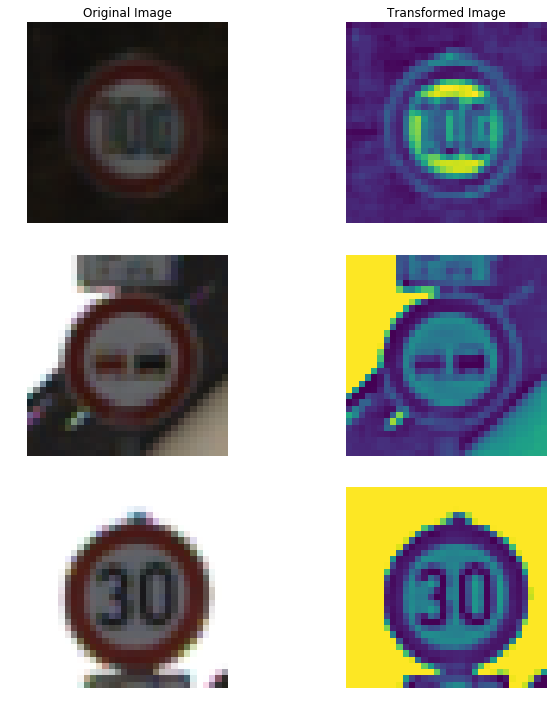

In [9]:
plt.figure(figsize=(10,10))
img = X_train[random.randint(0, len(X_train))]
plt.subplot(3,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.subplot(3,2,2)
plt.axis('off')
plt.imshow(transform_to_yuv(img)[:,:,0])
plt.title('Transformed Image')


img = X_train[random.randint(0, len(X_train))]
plt.subplot(3,2,3)
plt.imshow(img)
plt.axis('off')
plt.subplot(3,2,4)
plt.axis('off')
plt.imshow(transform_to_yuv(img)[:,:,0])

img = X_train[random.randint(0, len(X_train))]
plt.subplot(3,2,5)
plt.imshow(img)

plt.axis('off')
plt.subplot(3,2,6)
plt.axis('off')
plt.imshow(transform_to_yuv(img)[:,:,0])
plt.tight_layout()

#### Visualize Augmented Images WRT Original Images

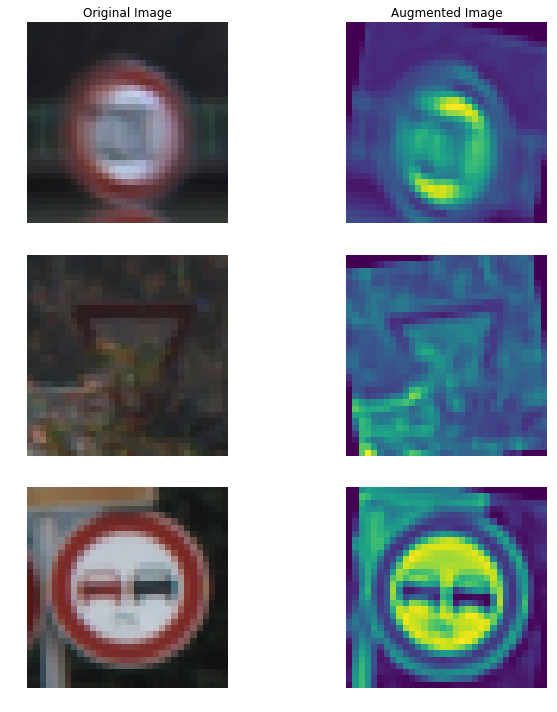

In [10]:
plt.figure(figsize=(10,10))
img = X_train[random.randint(0, len(X_train))]
plt.subplot(3,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.subplot(3,2,2)
plt.axis('off')
plt.imshow(augment_img(img)[:,:,0])
plt.title('Augmented Image')


img = X_train[random.randint(0, len(X_train))]
plt.subplot(3,2,3)
plt.imshow(img)
plt.axis('off')
plt.subplot(3,2,4)
plt.axis('off')
plt.imshow(augment_img(img)[:,:,0])

img = X_train[random.randint(0, len(X_train))]
plt.subplot(3,2,5)
plt.imshow(img)

plt.axis('off')
plt.subplot(3,2,6)
plt.axis('off')
plt.imshow(augment_img(img)[:,:,0])
plt.tight_layout()

#### Transform all images for irrespective of training, validation and testing purpose 

In [11]:
## create train, valid and test arrays to store data of Y cahnnel of the images only
X_train_Y = np.empty(shape=(X_train.shape[0],X_train.shape[1],X_train.shape[2],1))
X_test_Y = np.empty(shape=(X_test.shape[0],X_test.shape[1],X_test.shape[2],1))
X_valid_Y = np.empty(shape=(X_valid.shape[0],X_valid.shape[1],X_valid.shape[2],1))

In [12]:
for idx in range(X_train.shape[0]):
    X_train_Y[idx] = transform_to_yuv(X_train[idx])
for idx in range(X_test.shape[0]):
    X_test_Y[idx] = transform_to_yuv(X_test[idx])
for idx in range(X_valid.shape[0]):
    X_valid_Y[idx] = transform_to_yuv(X_valid[idx])

In [13]:
assert X_train_Y.shape[0] == y_train.shape[0]
assert X_test_Y.shape[0] == y_test.shape[0]
assert X_valid_Y.shape[0] == y_valid.shape[0]

#### Augment images to introduce more training images

In [14]:
from tqdm import tqdm

In [15]:
indices = np.random.choice(X_train.shape[0], int(.25*X_train.shape[0]), replace=False)  
for idx in tqdm(indices):
    agumented_img = augment_img(X_train[idx])
    X_train_Y = np.append(X_train_Y,np.expand_dims(agumented_img, axis=0),axis=0)
    y_train = np.append(y_train, np.expand_dims(y_train[idx], axis=0),axis=0)

100%|██████████| 8699/8699 [38:56<00:00,  3.38it/s]


In [16]:
assert X_train_Y.shape[0] == y_train.shape[0]

### Model Architecture

In [17]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

In [18]:
def TrafficSignRecognizer(x, keep_prob):
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional: Input = 32x32x1 Output = 30x30x6
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # Activation
    conv1 = tf.nn.relu(conv1)
    # Pooling: Input = 30x30x6 Output = 15x15x6
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional: Output = 13x13x16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # Activation:
    conv2 = tf.nn.relu(conv2)
    # Pooling: Input = 13x13x16 Output = 6x6x16
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 3: Convolutional: Output = 4x4x64
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 64), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(64))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    # Activation:
    conv3 = tf.nn.relu(conv3)
    # Pooling: Input = 4x4x64 Output = 2x2x64
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten: Input = 2x2x64 Output = 256
    fc0   = flatten(conv3)
    
    # Layer 1: Fully Connected: Input = 256 Output = 128
    fc1_W = tf.Variable(tf.truncated_normal(shape=(256, 128), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(128))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    # Activation
    fc1    = tf.nn.relu(fc1)
    # Dropout
    dr1 = tf.nn.dropout(fc1, keep_prob) 


    # Layer 2: Fully Connected: Input = 128 Output = 84
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(128, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(dr1, fc2_W) + fc2_b
    # Activation
    fc2    = tf.nn.relu(fc2)
    # Dropout
    dr2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 4: Fully Connected: Input = 84 Output = n_classes
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(dr2, fc4_W) + fc4_b
    
    return logits

In [19]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

In [20]:
rate = 0.0001

logits = TrafficSignRecognizer(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
predict_operation = tf.argmax(logits, 1)
predict_proba_operation = tf.nn.softmax(logits=logits)

In [21]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


def predict(X_data):
    num_examples = len(X_data)
    sess = tf.get_default_session()
    predicted_proba = list()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        predicted_proba.extend(sess.run(predict_proba_operation, feed_dict={x: batch_x, keep_prob: 1.0}))
    return predicted_proba

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [24]:
EPOCHS = 300
BATCH_SIZE = 32
saver = tf.train.Saver()

In [25]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        print("EPOCH {} ...".format(i+1))
        
        X_train_Y, y_train = shuffle(X_train_Y, y_train)
        for offset in tqdm(range(0, num_examples, BATCH_SIZE)):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_Y[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        
        training_accuracy = evaluate(X_train_Y, y_train)
        validation_accuracy = evaluate(X_valid_Y, y_valid)
        
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './trafficsignclassifier')
    print("Model saved")

Training...

EPOCH 1 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.86it/s]


Training Accuracy = 0.129
Validation Accuracy = 0.120

EPOCH 2 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.21it/s]


Training Accuracy = 0.253
Validation Accuracy = 0.231

EPOCH 3 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.48it/s]


Training Accuracy = 0.368
Validation Accuracy = 0.340

EPOCH 4 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.23it/s]


Training Accuracy = 0.475
Validation Accuracy = 0.420

EPOCH 5 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.12it/s]


Training Accuracy = 0.532
Validation Accuracy = 0.487

EPOCH 6 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.31it/s]


Training Accuracy = 0.595
Validation Accuracy = 0.546

EPOCH 7 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.34it/s]


Training Accuracy = 0.626
Validation Accuracy = 0.576

EPOCH 8 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.91it/s]


Training Accuracy = 0.666
Validation Accuracy = 0.621

EPOCH 9 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.40it/s]


Training Accuracy = 0.702
Validation Accuracy = 0.658

EPOCH 10 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.25it/s]


Training Accuracy = 0.717
Validation Accuracy = 0.680

EPOCH 11 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.40it/s]


Training Accuracy = 0.753
Validation Accuracy = 0.713

EPOCH 12 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.80it/s]


Training Accuracy = 0.772
Validation Accuracy = 0.726

EPOCH 13 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.77it/s]


Training Accuracy = 0.788
Validation Accuracy = 0.752

EPOCH 14 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.09it/s]


Training Accuracy = 0.802
Validation Accuracy = 0.759

EPOCH 15 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.98it/s]


Training Accuracy = 0.815
Validation Accuracy = 0.764

EPOCH 16 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.18it/s]


Training Accuracy = 0.831
Validation Accuracy = 0.785

EPOCH 17 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.30it/s]


Training Accuracy = 0.845
Validation Accuracy = 0.795

EPOCH 18 ...


100%|██████████| 1088/1088 [00:06<00:00, 174.66it/s]


Training Accuracy = 0.851
Validation Accuracy = 0.800

EPOCH 19 ...


100%|██████████| 1088/1088 [00:06<00:00, 167.11it/s]


Training Accuracy = 0.869
Validation Accuracy = 0.810

EPOCH 20 ...


100%|██████████| 1088/1088 [00:06<00:00, 173.60it/s]


Training Accuracy = 0.877
Validation Accuracy = 0.820

EPOCH 21 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.90it/s]


Training Accuracy = 0.881
Validation Accuracy = 0.823

EPOCH 22 ...


100%|██████████| 1088/1088 [00:06<00:00, 174.94it/s]


Training Accuracy = 0.889
Validation Accuracy = 0.821

EPOCH 23 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.17it/s]


Training Accuracy = 0.895
Validation Accuracy = 0.835

EPOCH 24 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.41it/s]


Training Accuracy = 0.900
Validation Accuracy = 0.842

EPOCH 25 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.36it/s]


Training Accuracy = 0.904
Validation Accuracy = 0.853

EPOCH 26 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.81it/s]


Training Accuracy = 0.912
Validation Accuracy = 0.861

EPOCH 27 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.21it/s]


Training Accuracy = 0.915
Validation Accuracy = 0.859

EPOCH 28 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.93it/s]


Training Accuracy = 0.919
Validation Accuracy = 0.874

EPOCH 29 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.01it/s]


Training Accuracy = 0.924
Validation Accuracy = 0.877

EPOCH 30 ...


100%|██████████| 1088/1088 [00:06<00:00, 171.27it/s]


Training Accuracy = 0.930
Validation Accuracy = 0.887

EPOCH 31 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.09it/s]


Training Accuracy = 0.929
Validation Accuracy = 0.876

EPOCH 32 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.15it/s]


Training Accuracy = 0.935
Validation Accuracy = 0.890

EPOCH 33 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.15it/s]


Training Accuracy = 0.938
Validation Accuracy = 0.895

EPOCH 34 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.34it/s]


Training Accuracy = 0.937
Validation Accuracy = 0.896

EPOCH 35 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.94it/s]


Training Accuracy = 0.943
Validation Accuracy = 0.894

EPOCH 36 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.50it/s]


Training Accuracy = 0.943
Validation Accuracy = 0.898

EPOCH 37 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.76it/s]


Training Accuracy = 0.947
Validation Accuracy = 0.899

EPOCH 38 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.01it/s]


Training Accuracy = 0.951
Validation Accuracy = 0.911

EPOCH 39 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.41it/s]


Training Accuracy = 0.953
Validation Accuracy = 0.907

EPOCH 40 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.29it/s]


Training Accuracy = 0.951
Validation Accuracy = 0.908

EPOCH 41 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.73it/s]


Training Accuracy = 0.956
Validation Accuracy = 0.912

EPOCH 42 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.96it/s]


Training Accuracy = 0.958
Validation Accuracy = 0.915

EPOCH 43 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.35it/s]


Training Accuracy = 0.956
Validation Accuracy = 0.912

EPOCH 44 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.32it/s]


Training Accuracy = 0.958
Validation Accuracy = 0.914

EPOCH 45 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.32it/s]


Training Accuracy = 0.963
Validation Accuracy = 0.922

EPOCH 46 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.37it/s]


Training Accuracy = 0.963
Validation Accuracy = 0.916

EPOCH 47 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.03it/s]


Training Accuracy = 0.964
Validation Accuracy = 0.921

EPOCH 48 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.37it/s]


Training Accuracy = 0.964
Validation Accuracy = 0.925

EPOCH 49 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.05it/s]


Training Accuracy = 0.967
Validation Accuracy = 0.923

EPOCH 50 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.14it/s]


Training Accuracy = 0.965
Validation Accuracy = 0.919

EPOCH 51 ...


100%|██████████| 1088/1088 [00:06<00:00, 165.86it/s]


Training Accuracy = 0.969
Validation Accuracy = 0.927

EPOCH 52 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.99it/s]


Training Accuracy = 0.970
Validation Accuracy = 0.928

EPOCH 53 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.79it/s]


Training Accuracy = 0.971
Validation Accuracy = 0.929

EPOCH 54 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.94it/s]


Training Accuracy = 0.974
Validation Accuracy = 0.934

EPOCH 55 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.41it/s]


Training Accuracy = 0.973
Validation Accuracy = 0.932

EPOCH 56 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.87it/s]


Training Accuracy = 0.975
Validation Accuracy = 0.929

EPOCH 57 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.02it/s]


Training Accuracy = 0.974
Validation Accuracy = 0.934

EPOCH 58 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.38it/s]


Training Accuracy = 0.974
Validation Accuracy = 0.930

EPOCH 59 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.76it/s]


Training Accuracy = 0.976
Validation Accuracy = 0.934

EPOCH 60 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.57it/s]


Training Accuracy = 0.977
Validation Accuracy = 0.934

EPOCH 61 ...


100%|██████████| 1088/1088 [00:06<00:00, 167.83it/s]


Training Accuracy = 0.977
Validation Accuracy = 0.933

EPOCH 62 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.97it/s]


Training Accuracy = 0.978
Validation Accuracy = 0.933

EPOCH 63 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.52it/s]


Training Accuracy = 0.978
Validation Accuracy = 0.937

EPOCH 64 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.02it/s]


Training Accuracy = 0.979
Validation Accuracy = 0.934

EPOCH 65 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.12it/s]


Training Accuracy = 0.979
Validation Accuracy = 0.935

EPOCH 66 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.68it/s]


Training Accuracy = 0.979
Validation Accuracy = 0.939

EPOCH 67 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.12it/s]


Training Accuracy = 0.980
Validation Accuracy = 0.932

EPOCH 68 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.27it/s]


Training Accuracy = 0.982
Validation Accuracy = 0.935

EPOCH 69 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.14it/s]


Training Accuracy = 0.981
Validation Accuracy = 0.941

EPOCH 70 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.80it/s]


Training Accuracy = 0.982
Validation Accuracy = 0.938

EPOCH 71 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.59it/s]


Training Accuracy = 0.983
Validation Accuracy = 0.939

EPOCH 72 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.66it/s]


Training Accuracy = 0.982
Validation Accuracy = 0.938

EPOCH 73 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.45it/s]


Training Accuracy = 0.984
Validation Accuracy = 0.937

EPOCH 74 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.88it/s]


Training Accuracy = 0.985
Validation Accuracy = 0.944

EPOCH 75 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.01it/s]


Training Accuracy = 0.984
Validation Accuracy = 0.944

EPOCH 76 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.89it/s]


Training Accuracy = 0.984
Validation Accuracy = 0.939

EPOCH 77 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.22it/s]


Training Accuracy = 0.983
Validation Accuracy = 0.937

EPOCH 78 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.06it/s]


Training Accuracy = 0.985
Validation Accuracy = 0.944

EPOCH 79 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.44it/s]


Training Accuracy = 0.985
Validation Accuracy = 0.940

EPOCH 80 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.65it/s]


Training Accuracy = 0.985
Validation Accuracy = 0.945

EPOCH 81 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.96it/s]


Training Accuracy = 0.986
Validation Accuracy = 0.942

EPOCH 82 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.68it/s]


Training Accuracy = 0.987
Validation Accuracy = 0.944

EPOCH 83 ...


100%|██████████| 1088/1088 [00:06<00:00, 167.32it/s]


Training Accuracy = 0.987
Validation Accuracy = 0.942

EPOCH 84 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.49it/s]


Training Accuracy = 0.985
Validation Accuracy = 0.944

EPOCH 85 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.15it/s]


Training Accuracy = 0.986
Validation Accuracy = 0.940

EPOCH 86 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.69it/s]


Training Accuracy = 0.988
Validation Accuracy = 0.951

EPOCH 87 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.49it/s]


Training Accuracy = 0.988
Validation Accuracy = 0.945

EPOCH 88 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.12it/s]


Training Accuracy = 0.988
Validation Accuracy = 0.944

EPOCH 89 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.62it/s]


Training Accuracy = 0.989
Validation Accuracy = 0.944

EPOCH 90 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.77it/s]


Training Accuracy = 0.989
Validation Accuracy = 0.949

EPOCH 91 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.40it/s]


Training Accuracy = 0.988
Validation Accuracy = 0.942

EPOCH 92 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.53it/s]


Training Accuracy = 0.989
Validation Accuracy = 0.943

EPOCH 93 ...


100%|██████████| 1088/1088 [00:06<00:00, 171.04it/s]


Training Accuracy = 0.989
Validation Accuracy = 0.945

EPOCH 94 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.66it/s]


Training Accuracy = 0.989
Validation Accuracy = 0.946

EPOCH 95 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.40it/s]


Training Accuracy = 0.988
Validation Accuracy = 0.948

EPOCH 96 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.99it/s]


Training Accuracy = 0.991
Validation Accuracy = 0.950

EPOCH 97 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.68it/s]


Training Accuracy = 0.991
Validation Accuracy = 0.949

EPOCH 98 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.30it/s]


Training Accuracy = 0.991
Validation Accuracy = 0.946

EPOCH 99 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.50it/s]


Training Accuracy = 0.990
Validation Accuracy = 0.949

EPOCH 100 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.96it/s]


Training Accuracy = 0.991
Validation Accuracy = 0.949

EPOCH 101 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.91it/s]


Training Accuracy = 0.990
Validation Accuracy = 0.948

EPOCH 102 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.30it/s]


Training Accuracy = 0.991
Validation Accuracy = 0.947

EPOCH 103 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.89it/s]


Training Accuracy = 0.991
Validation Accuracy = 0.950

EPOCH 104 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.14it/s]


Training Accuracy = 0.990
Validation Accuracy = 0.946

EPOCH 105 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.17it/s]


Training Accuracy = 0.992
Validation Accuracy = 0.950

EPOCH 106 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.83it/s]


Training Accuracy = 0.992
Validation Accuracy = 0.946

EPOCH 107 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.09it/s]


Training Accuracy = 0.992
Validation Accuracy = 0.949

EPOCH 108 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.94it/s]


Training Accuracy = 0.992
Validation Accuracy = 0.951

EPOCH 109 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.03it/s]


Training Accuracy = 0.993
Validation Accuracy = 0.952

EPOCH 110 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.88it/s]


Training Accuracy = 0.993
Validation Accuracy = 0.954

EPOCH 111 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.86it/s]


Training Accuracy = 0.992
Validation Accuracy = 0.954

EPOCH 112 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.00it/s]


Training Accuracy = 0.993
Validation Accuracy = 0.951

EPOCH 113 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.47it/s]


Training Accuracy = 0.993
Validation Accuracy = 0.953

EPOCH 114 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.61it/s]


Training Accuracy = 0.993
Validation Accuracy = 0.957

EPOCH 115 ...


100%|██████████| 1088/1088 [00:06<00:00, 169.21it/s]


Training Accuracy = 0.993
Validation Accuracy = 0.951

EPOCH 116 ...


100%|██████████| 1088/1088 [00:06<00:00, 170.61it/s]


Training Accuracy = 0.992
Validation Accuracy = 0.952

EPOCH 117 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.56it/s]


Training Accuracy = 0.993
Validation Accuracy = 0.953

EPOCH 118 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.78it/s]


Training Accuracy = 0.993
Validation Accuracy = 0.954

EPOCH 119 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.78it/s]


Training Accuracy = 0.993
Validation Accuracy = 0.956

EPOCH 120 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.34it/s]


Training Accuracy = 0.992
Validation Accuracy = 0.952

EPOCH 121 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.35it/s]


Training Accuracy = 0.995
Validation Accuracy = 0.954

EPOCH 122 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.59it/s]


Training Accuracy = 0.995
Validation Accuracy = 0.952

EPOCH 123 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.47it/s]


Training Accuracy = 0.993
Validation Accuracy = 0.948

EPOCH 124 ...


100%|██████████| 1088/1088 [00:06<00:00, 172.61it/s]


Training Accuracy = 0.994
Validation Accuracy = 0.958

EPOCH 125 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.08it/s]


Training Accuracy = 0.995
Validation Accuracy = 0.955

EPOCH 126 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.44it/s]


Training Accuracy = 0.994
Validation Accuracy = 0.956

EPOCH 127 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.22it/s]


Training Accuracy = 0.995
Validation Accuracy = 0.956

EPOCH 128 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.75it/s]


Training Accuracy = 0.994
Validation Accuracy = 0.956

EPOCH 129 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.93it/s]


Training Accuracy = 0.993
Validation Accuracy = 0.956

EPOCH 130 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.46it/s]


Training Accuracy = 0.995
Validation Accuracy = 0.956

EPOCH 131 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.21it/s]


Training Accuracy = 0.995
Validation Accuracy = 0.956

EPOCH 132 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.22it/s]


Training Accuracy = 0.995
Validation Accuracy = 0.954

EPOCH 133 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.95it/s]


Training Accuracy = 0.995
Validation Accuracy = 0.954

EPOCH 134 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.79it/s]


Training Accuracy = 0.995
Validation Accuracy = 0.959

EPOCH 135 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.25it/s]


Training Accuracy = 0.995
Validation Accuracy = 0.952

EPOCH 136 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.96it/s]


Training Accuracy = 0.995
Validation Accuracy = 0.959

EPOCH 137 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.30it/s]


Training Accuracy = 0.994
Validation Accuracy = 0.956

EPOCH 138 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.28it/s]


Training Accuracy = 0.995
Validation Accuracy = 0.958

EPOCH 139 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.93it/s]


Training Accuracy = 0.996
Validation Accuracy = 0.960

EPOCH 140 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.43it/s]


Training Accuracy = 0.995
Validation Accuracy = 0.955

EPOCH 141 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.99it/s]


Training Accuracy = 0.995
Validation Accuracy = 0.955

EPOCH 142 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.36it/s]


Training Accuracy = 0.995
Validation Accuracy = 0.955

EPOCH 143 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.18it/s]


Training Accuracy = 0.995
Validation Accuracy = 0.954

EPOCH 144 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.19it/s]


Training Accuracy = 0.996
Validation Accuracy = 0.959

EPOCH 145 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.56it/s]


Training Accuracy = 0.996
Validation Accuracy = 0.956

EPOCH 146 ...


100%|██████████| 1088/1088 [00:06<00:00, 180.30it/s]


Training Accuracy = 0.995
Validation Accuracy = 0.952

EPOCH 147 ...


100%|██████████| 1088/1088 [00:06<00:00, 174.61it/s]


Training Accuracy = 0.995
Validation Accuracy = 0.953

EPOCH 148 ...


100%|██████████| 1088/1088 [00:06<00:00, 170.65it/s]


Training Accuracy = 0.996
Validation Accuracy = 0.960

EPOCH 149 ...


100%|██████████| 1088/1088 [00:06<00:00, 180.83it/s]


Training Accuracy = 0.996
Validation Accuracy = 0.956

EPOCH 150 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.50it/s]


Training Accuracy = 0.996
Validation Accuracy = 0.956

EPOCH 151 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.78it/s]


Training Accuracy = 0.996
Validation Accuracy = 0.956

EPOCH 152 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.84it/s]


Training Accuracy = 0.996
Validation Accuracy = 0.958

EPOCH 153 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.59it/s]


Training Accuracy = 0.997
Validation Accuracy = 0.961

EPOCH 154 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.93it/s]


Training Accuracy = 0.996
Validation Accuracy = 0.956

EPOCH 155 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.58it/s]


Training Accuracy = 0.997
Validation Accuracy = 0.958

EPOCH 156 ...


100%|██████████| 1088/1088 [00:06<00:00, 166.03it/s]


Training Accuracy = 0.996
Validation Accuracy = 0.959

EPOCH 157 ...


100%|██████████| 1088/1088 [00:06<00:00, 180.23it/s]


Training Accuracy = 0.996
Validation Accuracy = 0.959

EPOCH 158 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.88it/s]


Training Accuracy = 0.997
Validation Accuracy = 0.959

EPOCH 159 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.18it/s]


Training Accuracy = 0.996
Validation Accuracy = 0.956

EPOCH 160 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.40it/s]


Training Accuracy = 0.997
Validation Accuracy = 0.959

EPOCH 161 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.09it/s]


Training Accuracy = 0.996
Validation Accuracy = 0.961

EPOCH 162 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.25it/s]


Training Accuracy = 0.997
Validation Accuracy = 0.958

EPOCH 163 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.23it/s]


Training Accuracy = 0.997
Validation Accuracy = 0.958

EPOCH 164 ...


100%|██████████| 1088/1088 [00:06<00:00, 180.37it/s]


Training Accuracy = 0.996
Validation Accuracy = 0.960

EPOCH 165 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.70it/s]


Training Accuracy = 0.996
Validation Accuracy = 0.959

EPOCH 166 ...


100%|██████████| 1088/1088 [00:06<00:00, 180.03it/s]


Training Accuracy = 0.996
Validation Accuracy = 0.956

EPOCH 167 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.89it/s]


Training Accuracy = 0.997
Validation Accuracy = 0.962

EPOCH 168 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.43it/s]


Training Accuracy = 0.997
Validation Accuracy = 0.956

EPOCH 169 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.35it/s]


Training Accuracy = 0.996
Validation Accuracy = 0.952

EPOCH 170 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.36it/s]


Training Accuracy = 0.997
Validation Accuracy = 0.956

EPOCH 171 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.63it/s]


Training Accuracy = 0.997
Validation Accuracy = 0.959

EPOCH 172 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.54it/s]


Training Accuracy = 0.997
Validation Accuracy = 0.958

EPOCH 173 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.02it/s]


Training Accuracy = 0.996
Validation Accuracy = 0.957

EPOCH 174 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.90it/s]


Training Accuracy = 0.997
Validation Accuracy = 0.959

EPOCH 175 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.43it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.962

EPOCH 176 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.26it/s]


Training Accuracy = 0.997
Validation Accuracy = 0.956

EPOCH 177 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.28it/s]


Training Accuracy = 0.997
Validation Accuracy = 0.957

EPOCH 178 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.70it/s]


Training Accuracy = 0.997
Validation Accuracy = 0.957

EPOCH 179 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.64it/s]


Training Accuracy = 0.997
Validation Accuracy = 0.961

EPOCH 180 ...


100%|██████████| 1088/1088 [00:06<00:00, 164.72it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.963

EPOCH 181 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.15it/s]


Training Accuracy = 0.997
Validation Accuracy = 0.960

EPOCH 182 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.54it/s]


Training Accuracy = 0.996
Validation Accuracy = 0.956

EPOCH 183 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.52it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.958

EPOCH 184 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.84it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.962

EPOCH 185 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.35it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.957

EPOCH 186 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.81it/s]


Training Accuracy = 0.997
Validation Accuracy = 0.957

EPOCH 187 ...


100%|██████████| 1088/1088 [00:06<00:00, 174.51it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.961

EPOCH 188 ...


100%|██████████| 1088/1088 [00:06<00:00, 168.38it/s]


Training Accuracy = 0.997
Validation Accuracy = 0.959

EPOCH 189 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.04it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.960

EPOCH 190 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.54it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.959

EPOCH 191 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.01it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.960

EPOCH 192 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.95it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.961

EPOCH 193 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.93it/s]


Training Accuracy = 0.997
Validation Accuracy = 0.961

EPOCH 194 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.63it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.962

EPOCH 195 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.95it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.961

EPOCH 196 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.48it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.959

EPOCH 197 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.24it/s]


Training Accuracy = 0.996
Validation Accuracy = 0.959

EPOCH 198 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.15it/s]


Training Accuracy = 0.997
Validation Accuracy = 0.956

EPOCH 199 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.52it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.961

EPOCH 200 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.52it/s]


Training Accuracy = 0.997
Validation Accuracy = 0.960

EPOCH 201 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.45it/s]


Training Accuracy = 0.997
Validation Accuracy = 0.959

EPOCH 202 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.48it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.965

EPOCH 203 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.89it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.963

EPOCH 204 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.11it/s]


Training Accuracy = 0.997
Validation Accuracy = 0.963

EPOCH 205 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.05it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.962

EPOCH 206 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.99it/s]


Training Accuracy = 0.996
Validation Accuracy = 0.957

EPOCH 207 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.98it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.961

EPOCH 208 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.56it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.961

EPOCH 209 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.88it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.962

EPOCH 210 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.38it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.961

EPOCH 211 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.77it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.961

EPOCH 212 ...


100%|██████████| 1088/1088 [00:06<00:00, 169.37it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.961

EPOCH 213 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.51it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.959

EPOCH 214 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.75it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.960

EPOCH 215 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.80it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.959

EPOCH 216 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.80it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.961

EPOCH 217 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.49it/s]


Training Accuracy = 0.997
Validation Accuracy = 0.955

EPOCH 218 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.76it/s]


Training Accuracy = 0.997
Validation Accuracy = 0.954

EPOCH 219 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.65it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.958

EPOCH 220 ...


100%|██████████| 1088/1088 [00:06<00:00, 171.84it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.962

EPOCH 221 ...


100%|██████████| 1088/1088 [00:06<00:00, 180.69it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.959

EPOCH 222 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.21it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.950

EPOCH 223 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.72it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.958

EPOCH 224 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.36it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.962

EPOCH 225 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.31it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.958

EPOCH 226 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.73it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.962

EPOCH 227 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.76it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.960

EPOCH 228 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.32it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.962

EPOCH 229 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.41it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.958

EPOCH 230 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.74it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.959

EPOCH 231 ...


100%|██████████| 1088/1088 [00:06<00:00, 178.53it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.960

EPOCH 232 ...


100%|██████████| 1088/1088 [00:06<00:00, 180.01it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.963

EPOCH 233 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.69it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.961

EPOCH 234 ...


100%|██████████| 1088/1088 [00:06<00:00, 179.21it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.961

EPOCH 235 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.45it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.964

EPOCH 236 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.28it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.960

EPOCH 237 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.84it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.959

EPOCH 238 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.27it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.962

EPOCH 239 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.69it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.963

EPOCH 240 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.84it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.961

EPOCH 241 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.90it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.965

EPOCH 242 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.38it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.960

EPOCH 243 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.58it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.961

EPOCH 244 ...


100%|██████████| 1088/1088 [00:06<00:00, 172.73it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.964

EPOCH 245 ...


100%|██████████| 1088/1088 [00:06<00:00, 167.71it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.957

EPOCH 246 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.98it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.966

EPOCH 247 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.19it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.961

EPOCH 248 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.60it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.961

EPOCH 249 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.39it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.961

EPOCH 250 ...


100%|██████████| 1088/1088 [00:06<00:00, 174.59it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.966

EPOCH 251 ...


100%|██████████| 1088/1088 [00:06<00:00, 171.71it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.959

EPOCH 252 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.94it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.963

EPOCH 253 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.05it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.965

EPOCH 254 ...


100%|██████████| 1088/1088 [00:06<00:00, 174.97it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.963

EPOCH 255 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.73it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.961

EPOCH 256 ...


100%|██████████| 1088/1088 [00:06<00:00, 174.33it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.963

EPOCH 257 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.22it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.960

EPOCH 258 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.72it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.961

EPOCH 259 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.83it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.962

EPOCH 260 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.16it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.961

EPOCH 261 ...


100%|██████████| 1088/1088 [00:06<00:00, 174.89it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.959

EPOCH 262 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.83it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.958

EPOCH 263 ...


100%|██████████| 1088/1088 [00:06<00:00, 174.45it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.963

EPOCH 264 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.00it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.961

EPOCH 265 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.69it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.965

EPOCH 266 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.90it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.958

EPOCH 267 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.05it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.961

EPOCH 268 ...


100%|██████████| 1088/1088 [00:06<00:00, 174.07it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.961

EPOCH 269 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.56it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.964

EPOCH 270 ...


100%|██████████| 1088/1088 [00:06<00:00, 174.03it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.960

EPOCH 271 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.72it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.960

EPOCH 272 ...


100%|██████████| 1088/1088 [00:06<00:00, 174.13it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.961

EPOCH 273 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.21it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.960

EPOCH 274 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.57it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.955

EPOCH 275 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.65it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.963

EPOCH 276 ...


100%|██████████| 1088/1088 [00:06<00:00, 168.07it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.961

EPOCH 277 ...


100%|██████████| 1088/1088 [00:06<00:00, 172.62it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.961

EPOCH 278 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.41it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.960

EPOCH 279 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.43it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.961

EPOCH 280 ...


100%|██████████| 1088/1088 [00:06<00:00, 177.20it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.963

EPOCH 281 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.76it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.962

EPOCH 282 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.17it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.967

EPOCH 283 ...


100%|██████████| 1088/1088 [00:06<00:00, 170.60it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.961

EPOCH 284 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.13it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.963

EPOCH 285 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.00it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.962

EPOCH 286 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.08it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.963

EPOCH 287 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.83it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.960

EPOCH 288 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.46it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.963

EPOCH 289 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.43it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.963

EPOCH 290 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.54it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.963

EPOCH 291 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.75it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.966

EPOCH 292 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.26it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.960

EPOCH 293 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.85it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.965

EPOCH 294 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.02it/s]


Training Accuracy = 0.998
Validation Accuracy = 0.961

EPOCH 295 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.83it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.963

EPOCH 296 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.02it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.965

EPOCH 297 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.65it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.961

EPOCH 298 ...


100%|██████████| 1088/1088 [00:06<00:00, 175.94it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.959

EPOCH 299 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.02it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.964

EPOCH 300 ...


100%|██████████| 1088/1088 [00:06<00:00, 176.66it/s]


Training Accuracy = 0.999
Validation Accuracy = 0.963

Model saved


In [26]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print('Accuracy Model On Training Images: {:.2f}'.format(evaluate(X_train_Y,y_train)))
    print('Accuracy Model On Validation Images: {:.2f}'.format(evaluate(X_valid_Y,y_valid))) 
    print('Accuracy Model On Test Images: {:.2f}'.format(evaluate(X_test_Y,y_test)))

INFO:tensorflow:Restoring parameters from ./trafficsignclassifier
Accuracy Model On Training Images: 1.00
Accuracy Model On Validation Images: 0.96
Accuracy Model On Test Images: 0.95


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [116]:
import glob
from skimage import io
from skimage import transform

external_imgs = sorted(glob.glob('./external_imgs/*.png'))
external_labels = np.array([1, 40, 35, 15, 37, 18])

figures = {}
labels = {}
traffic_signs = []
index = 0
for img_name in external_imgs:
    img = io.imread(img_name)
    img = cv2.resize(img, (32, 32)) 
    traffic_signs.append(img)
    figures[index] = img
    labels[index] = get_class_name(external_labels[index])
    index += 1

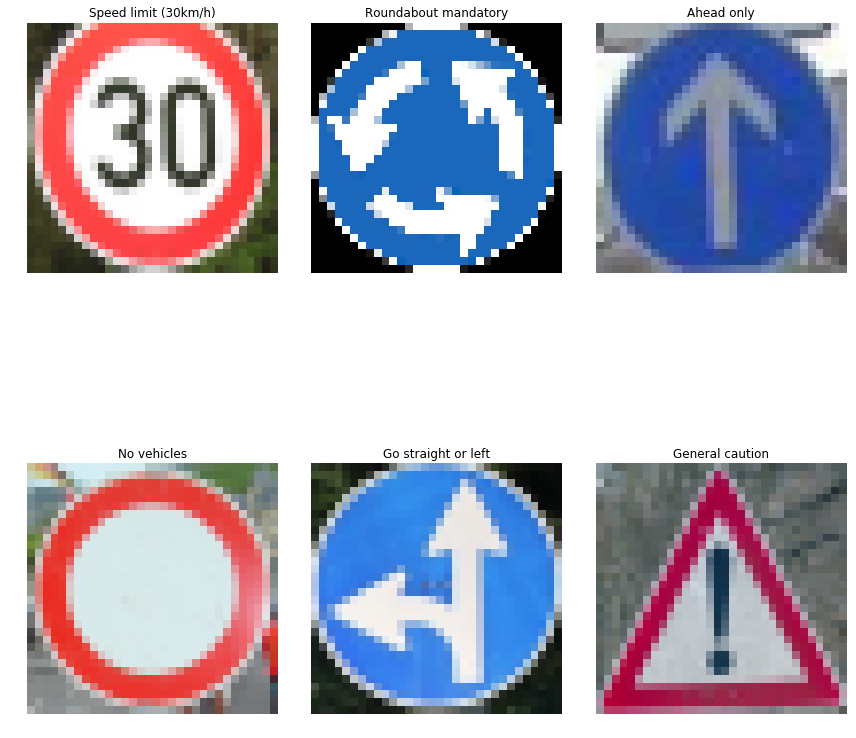

In [117]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12, 14))
axs = axs.ravel()
for index, title in zip(range(len(figures)), figures):
    axs[index].imshow(figures[title], plt.gray())
    if(labels != None):
        axs[index].set_title(labels[index])
    else:
        axs[index].set_title(title)
    axs[index].set_axis_off()
plt.tight_layout()

### Predict the Sign Type for Each Image

In [118]:
traffic_signs = np.array(traffic_signs)
traffic_signs_test = np.empty(shape=(traffic_signs.shape[0],traffic_signs.shape[1],traffic_signs.shape[2],1))
for idx in range(traffic_signs.shape[0]):
    traffic_signs_test[idx] = transform_to_yuv(traffic_signs[idx])

INFO:tensorflow:Restoring parameters from ./trafficsignclassifier
predicted_signs:-


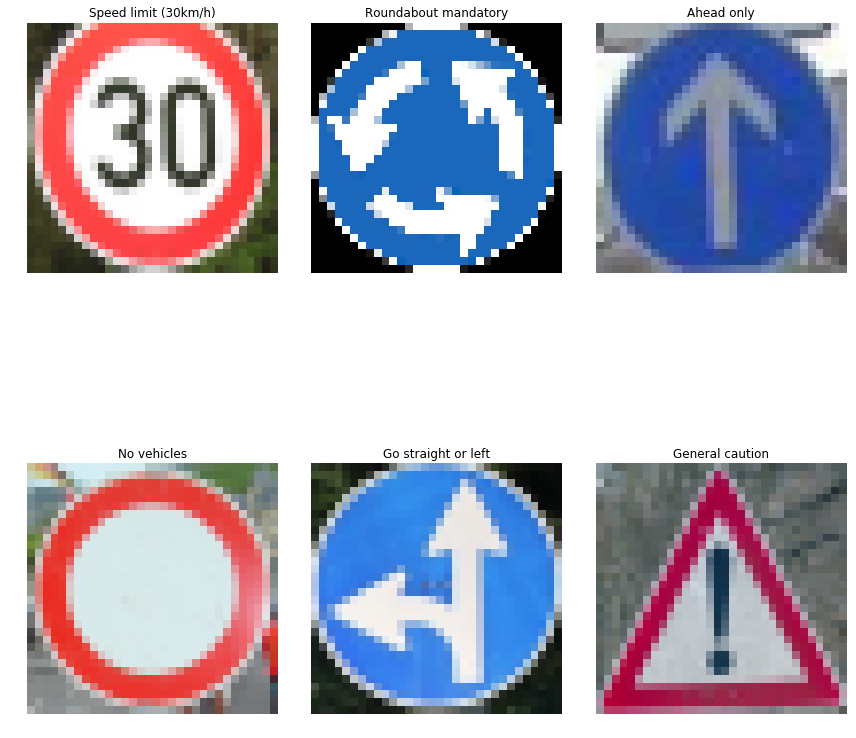

In [119]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))  
    predicted_signs = sess.run(predict_operation, feed_dict={x: traffic_signs_test, keep_prob:1.0})
    print("predicted_signs:-")
    figures = {}
    labels = {}
    index = 0
    for img in traffic_signs:
        figures[index] = img
        labels[index] = get_class_name(external_labels[index])
        index += 1
    fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12, 14))
    axs = axs.ravel()
    for index, title in zip(range(len(figures)), figures):
        axs[index].imshow(figures[title], plt.gray())
        if(labels != None):
            axs[index].set_title(get_class_name(predicted_signs[index]))
        else:
            axs[index].set_title(title)
        axs[index].set_axis_off()
    plt.tight_layout()

### Analyze Performance

In [120]:
with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        saver.restore(sess, tf.train.latest_checkpoint('.'))  
        predicted_proba = np.vstack(predict(traffic_signs_test))
        accuracy = evaluate(traffic_signs_test, external_labels)
        print("Image Accuracy = {:.3f}".format(accuracy))

INFO:tensorflow:Restoring parameters from ./trafficsignclassifier
Image Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [121]:
for true_label,row in zip(external_labels,predicted_proba):
    top5k = np.argsort(row)[::-1][:5]
    top5p = np.sort(row)[::-1][:5]
    print('Top 5 Labels for image \'{}\':'.format(get_class_name(true_label)))
    for k,p in zip(top5k,top5p):
          print(' - \'{}\' with prob = {:.2f} '.format(get_class_name(k),p))

Top 5 Labels for image 'Speed limit (30km/h)':
 - 'Speed limit (30km/h)' with prob = 1.00 
 - 'Speed limit (50km/h)' with prob = 0.00 
 - 'Speed limit (70km/h)' with prob = 0.00 
 - 'Speed limit (20km/h)' with prob = 0.00 
 - 'Speed limit (80km/h)' with prob = 0.00 
Top 5 Labels for image 'Roundabout mandatory':
 - 'Roundabout mandatory' with prob = 0.95 
 - 'No entry' with prob = 0.04 
 - 'Keep right' with prob = 0.00 
 - 'Turn right ahead' with prob = 0.00 
 - 'Keep left' with prob = 0.00 
Top 5 Labels for image 'Ahead only':
 - 'Ahead only' with prob = 1.00 
 - 'Go straight or right' with prob = 0.00 
 - 'Turn left ahead' with prob = 0.00 
 - 'Turn right ahead' with prob = 0.00 
 - 'Speed limit (60km/h)' with prob = 0.00 
Top 5 Labels for image 'No vehicles':
 - 'No vehicles' with prob = 0.94 
 - 'Priority road' with prob = 0.06 
 - 'Yield' with prob = 0.00 
 - 'Ahead only' with prob = 0.00 
 - 'Keep right' with prob = 0.00 
Top 5 Labels for image 'Go straight or left':
 - 'Go strai

In [3]:
!jupyter nbconvert Traffic_Sign_Classifier.ipynb

[NbConvertApp] Converting notebook Traffic_Sign_Classifier.ipynb to html
[NbConvertApp] Writing 784118 bytes to Traffic_Sign_Classifier.html


---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")